In [14]:
import numpy as np
import imageio as imo
import time
import scipy.misc as msc

#Reading the image
f = imo.imread('bauckhage.jpg')

###Naive Approach
def naiveApproach(filterSize,img):
    rows = img.shape[0]
    cols = img.shape[1]
    sigma = (filterSize - 1.0) / (2.0 * 2.575)
    halfSize = (int)(filterSize/2)
    tmp = np.zeros_like(img)
    for M in range(0,rows):
        for N in range(0,cols):
            sumx=0
            for i in range(-halfSize,halfSize+1):
                for j in range(-halfSize,halfSize+1):
                    if M+i>=0 and M+i<rows and N+j>=0 and N+j<cols:
                        sumx+=img[M+i][N+j]*np.exp(-0.5 * (((i)**2+(j)**2)/(sigma)**2))
            sumx = sumx*(1/(2*np.pi*sigma*sigma))
            tmp[M][N] = sumx
    return

###Smart Approach(Breaking in 1D):
def smartApproach(filterSize,img):
    rows = img.shape[0]
    cols = img.shape[1]
    sigma = (filterSize - 1.0) / (2.0 * 2.575)
    halfSize = (int)(filterSize/2)
    tmp = np.zeros_like(img)
    #first convolve the rows
    for M in range(0,rows):
        for N in range(0,cols):
            sumx=0
            for j in range(-halfSize,halfSize+1):
                if N+j>=0 and N+j<cols:
                    sumx+=img[M][N+j]*np.exp(-0.5 * (j / sigma)**2)
            tmp[M][N]=sumx*(1/(np.sqrt(2*np.pi)*sigma))
    
    #Now convolve with cols
    for N in range(0,cols):
        for M in range(0,rows):
            sumx=0
            for i in range(-halfSize,halfSize+1):
                if M+i>=0 and M+i<rows:
                    sumx+=tmp[M+i][N]*np.exp(-0.5 * (i / sigma)**2)
            tmp[M][N]=sumx*(1/(np.sqrt(2*np.pi)*sigma))
    return

def multiplyApproach(filterSize,img):
    rows = img.shape[0]
    cols = img.shape[1]
    
    img = np.divide(img,255)
    #Apply Gaussian Function in freq domain
    sigma = (filterSize - 1.0) / (2.0 * 2.575)
    halfSize = (int)(rows/2)
    
    x = np.arange(rows)
    g = np.exp(-0.5 * ((x-halfSize) / sigma)**2)
    G = np.outer(g,g)
#     msc.toimage(G).save('gauss.jpg') 
    
    fourier_image=np.fft.fft2(img)
    fourier_image = np.fft.fftshift(fourier_image)
#     msc.toimage(np.log10(np.abs(fourier_image))).save('fourier_image.jpg')
    
    fourier_filter=np.fft.fft2(G)
    fourier_filter= np.fft.fftshift(fourier_filter)
    fourier_filter= np.abs(fourier_filter)
    fourier_filter/=np.max(fourier_filter)
#     msc.toimage(fourier_filter).save('fourier_filter.jpg')
    
    tmp = np.zeros_like(img)
    tmp = np.multiply(fourier_image,fourier_filter)
#     msc.toimage(np.log10(np.abs(tmp))).save('multiplied.jpg')
       
    inverse_fftshift=np.fft.ifftshift(tmp)
    inverse_fourier=np.fft.ifft2(inverse_fftshift)
#     msc.toimage(np.abs(inverse_fourier)).save('Filtered.jpg')

    return


# lets calculate timing now
# arryas to hold timing data
naiveGaussTimeArr = np.zeros(22)
#Naive One
for i in range(3,22,2):
    naiveGaussTimeArr[i]=0.0
    for j in range(0,9):
        t1 = time.time()
        naiveApproach(i,f)
        t2 = time.time()
        naiveGaussTimeArr[i]+=(t2-t1)
    naiveGaussTimeArr[i] /= 10.0
    print(naiveGaussTimeArr[i])

#arryas to hold timing data
smartGaussTimeArr = np.zeros(22)
#Smart One
for i in range(3,22,2):
    smartGaussTimeArr[i]=0.0
    for j in range(0,9):
        t1 = time.time()
        smartApproach(i,f)
        t2 = time.time()
        smartGaussTimeArr[i]+=(t2-t1)
    smartGaussTimeArr[i] /=10.0
    print(smartGaussTimeArr[i])
    
#arryas to hold timing data
multiplyApproachTimeArr = np.zeros(22)
#Multiply Approach
for i in range(3,22,2):
    multiplyApproachTimeArr[i]=0.0
    for j in range(0,9):
        t1 = time.time()
        multiplyApproach(i,f)
        t2 = time.time()
        multiplyApproachTimeArr[i]+=(t2-t1)
    multiplyApproachTimeArr[i] /= 10.0
    print(multiplyApproachTimeArr[i])

print(naiveGaussTimeArr)
print(smartGaussTimeArr)
print(multiplyApproachTimeArr)

4.098014497756958
10.455225038528443
20.128473567962647
33.18397855758667
48.975145268440244
67.85731663703919
90.18848435878753
114.9924658536911
142.6881474971771
173.83238053321838
2.8344202518463133
4.345724511146545
5.760086584091186
7.182096552848816
8.634320616722107
10.137550830841064
11.548905777931214
13.003176379203797
14.400067496299744
15.807248497009278
0.006244826316833496
0.004686427116394043
0.007200932502746582
0.007410430908203125
0.005186915397644043
0.006732058525085449
0.005425143241882324
0.006063055992126465
0.006497383117675781
0.0064125537872314455
[  0.           0.           0.           4.0980145    0.
  10.45522504   0.          20.12847357   0.          33.18397856
   0.          48.97514527   0.          67.85731664   0.
  90.18848436   0.         114.99246585   0.         142.6881475
   0.         173.83238053]
[ 0.          0.          0.          2.83442025  0.          4.34572451
  0.          5.76008658  0.          7.18209655  0.          8.6343206

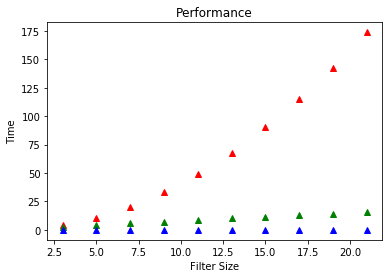

In [15]:
import matplotlib.pyplot as plt

for i in range(3,22,2):
    plt.plot(i,naiveGaussTimeArr[i],'r^')
    plt.plot(i,smartGaussTimeArr[i],'g^')
    plt.plot(i,multiplyApproachTimeArr[i],'b^')
    
plt.xlabel('Filter Size')
plt.ylabel('Time')
plt.title('Performance')
plt.show()


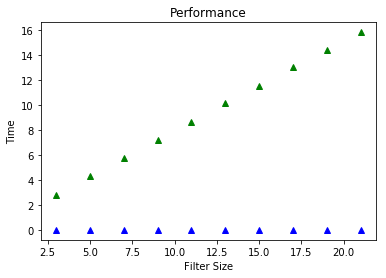

In [16]:
import matplotlib.pyplot as plt

for i in range(3,22,2):
#     plt.plot(i,naiveGaussTimeArr[i],'r^')
    plt.plot(i,smartGaussTimeArr[i],'g^')
    plt.plot(i,multiplyApproachTimeArr[i],'b^')
    
plt.xlabel('Filter Size')
plt.ylabel('Time')
plt.title('Performance')
plt.show()